In [ ]:
import pandas as pd

df = pd.read_csv('/content/traffic.csv')
df

DateTime  Junction  Vehicles           ID
0      2015-11-01 00:00:00         1        15  20151101001
1      2015-11-01 01:00:00         1        13  20151101011
2      2015-11-01 02:00:00         1        10  20151101021
3      2015-11-01 03:00:00         1         7  20151101031
4      2015-11-01 04:00:00         1         9  20151101041
...                    ...       ...       ...          ...
48115  2017-06-30 19:00:00         4        11  20170630194
48116  2017-06-30 20:00:00         4        30  20170630204
48117  2017-06-30 21:00:00         4        16  20170630214
48118  2017-06-30 22:00:00         4        22  20170630224
48119  2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 4 columns]

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

df = df.sort_values(by='DateTime').reset_index(drop=True)

print(df.head())

             DateTime  Junction  Vehicles           ID
0 2015-11-01 00:00:00         1        15  20151101001
1 2015-11-01 00:00:00         2         6  20151101002
2 2015-11-01 00:00:00         3         9  20151101003
3 2015-11-01 01:00:00         3         7  20151101013
4 2015-11-01 01:00:00         1        13  20151101011


In [ ]:
pivot_df = df.pivot(index='DateTime', columns='Junction', values='Vehicles')

pivot_df = pivot_df.fillna(0)

def create_lag_features(data):
    df_lag = data.copy()
    for i in range(1, 2):
        df_shifted = data.shift(i)
        df_shifted.columns = [f"{col}(H-{i})" for col in data.columns]
        df_lag = pd.concat([df_lag, df_shifted], axis=1)
    return df_lag.dropna()

Xy = create_lag_features(pivot_df)
Xy


1     2     3     4  1(H-1)  2(H-1)  3(H-1)  4(H-1)
DateTime                                                                    
2015-11-01 01:00:00   13.0   6.0   7.0   0.0    15.0     6.0     9.0     0.0
2015-11-01 02:00:00   10.0   5.0   5.0   0.0    13.0     6.0     7.0     0.0
2015-11-01 03:00:00    7.0   6.0   1.0   0.0    10.0     5.0     5.0     0.0
2015-11-01 04:00:00    9.0   7.0   2.0   0.0     7.0     6.0     1.0     0.0
2015-11-01 05:00:00    6.0   2.0   2.0   0.0     9.0     7.0     2.0     0.0
...                    ...   ...   ...   ...     ...     ...     ...     ...
2017-06-30 19:00:00  105.0  34.0  33.0  11.0    95.0    34.0    38.0    17.0
2017-06-30 20:00:00   96.0  35.0  31.0  30.0   105.0    34.0    33.0    11.0
2017-06-30 21:00:00   90.0  31.0  28.0  16.0    96.0    35.0    31.0    30.0
2017-06-30 22:00:00   84.0  29.0  26.0  22.0    90.0    31.0    28.0    16.0
2017-06-30 23:00:00   78.0  27.0  39.0  12.0    84.0    29.0    26.0    22.0

[14591 rows x 8 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = Xy.iloc[:, len(pivot_df.columns):]
y = Xy.iloc[:, :len(pivot_df.columns)]

X_train = X[X.index < '2017-04-01']
X_test = X[X.index >= '2017-04-01']
y_train = y[y.index < '2017-04-01']
y_test = y[y.index >= '2017-04-01']

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled
X_test_scaled

array([[0.41721854, 0.66666667, 0.16201117, 0.21428571],
       [0.38410596, 0.61538462, 0.12290503, 0.21428571],
       [0.31788079, 0.69230769, 0.07821229, 0.17857143],
       ...,
       [0.60264901, 0.87179487, 0.16759777, 1.07142857],
       [0.56291391, 0.76923077, 0.15083799, 0.57142857],
       [0.52317881, 0.71794872, 0.1396648 , 0.78571429]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 33.56712036361297


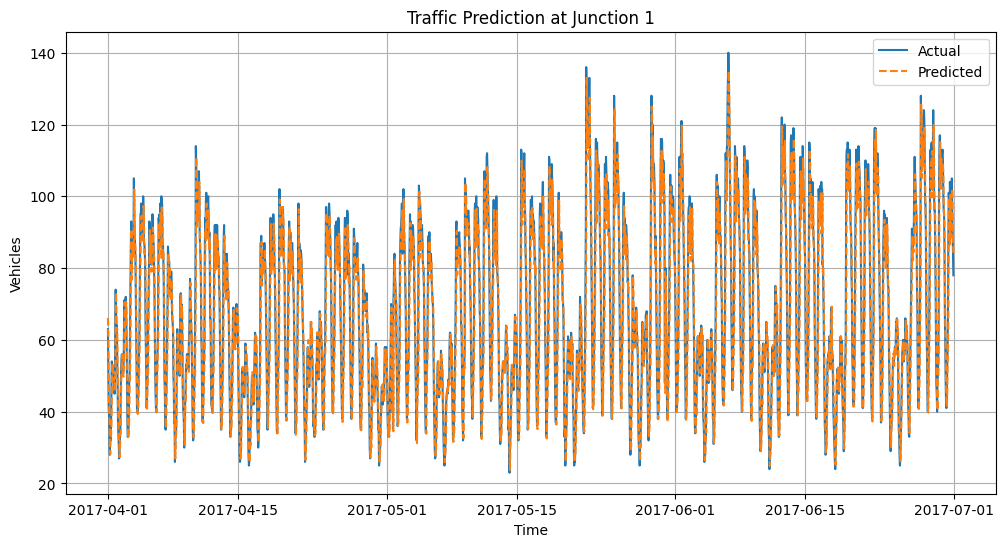

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.iloc[:, 0], label='Actual')
plt.plot(y_test.index, y_pred[:, 0], label='Predicted', linestyle='--')
plt.title('Traffic Prediction at Junction 1')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.grid(True)
plt.show()

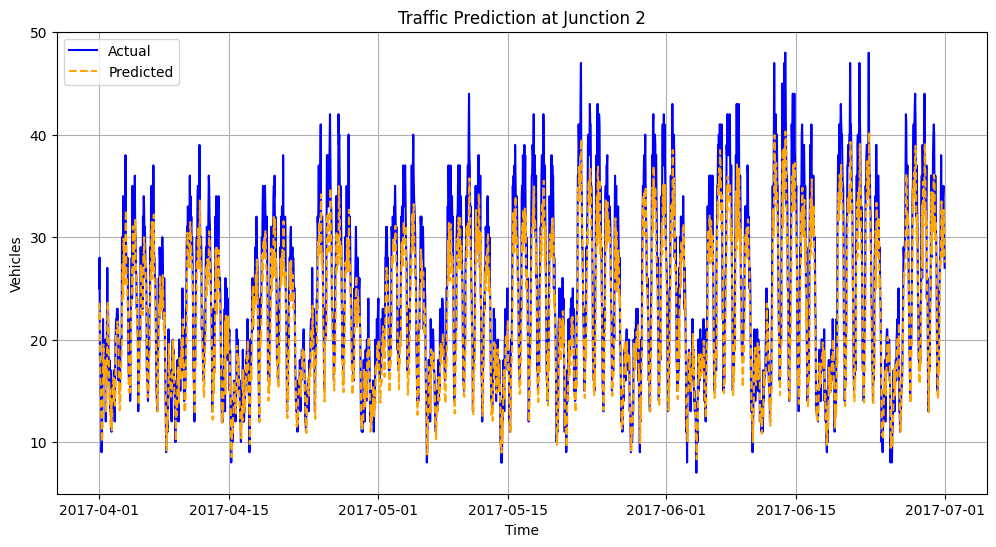

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.iloc[:, 1], label='Actual', color='blue')
plt.plot(y_test.index, y_pred[:, 1], label='Predicted', linestyle='--', color='orange')
plt.title('Traffic Prediction at Junction 2')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.grid(True)
plt.show()


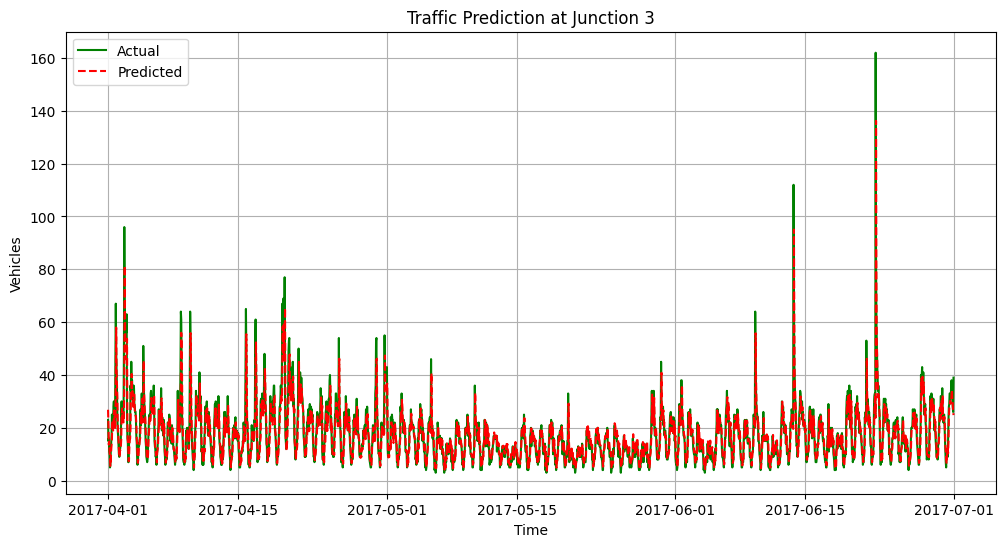

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.iloc[:, 2], label='Actual', color='green')
plt.plot(y_test.index, y_pred[:, 2], label='Predicted', linestyle='--', color='red')
plt.title('Traffic Prediction at Junction 3')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.grid(True)
plt.show()


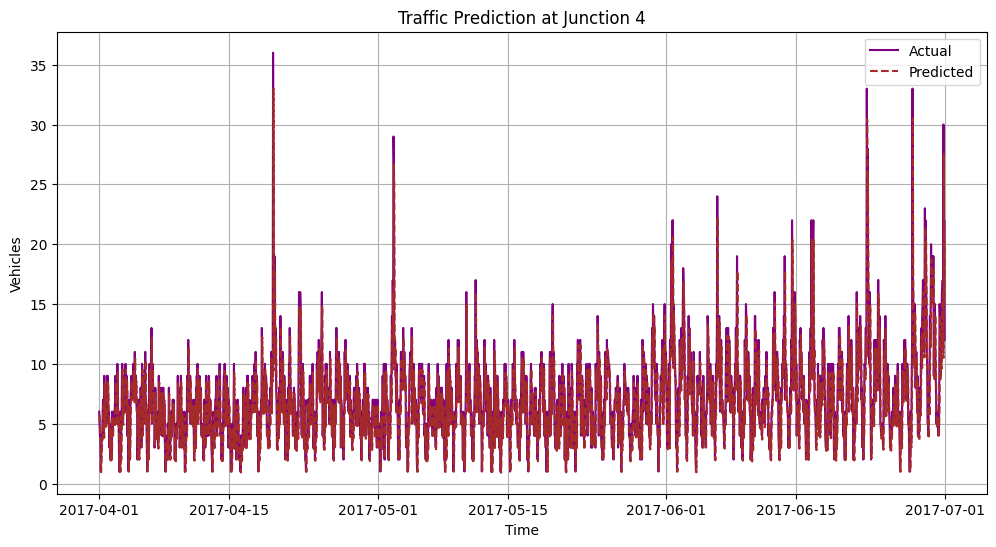

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.iloc[:, 3], label='Actual', color='purple')
plt.plot(y_test.index, y_pred[:, 3], label='Predicted', linestyle='--', color='brown')
plt.title('Traffic Prediction at Junction 4')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.grid(True)
plt.show()

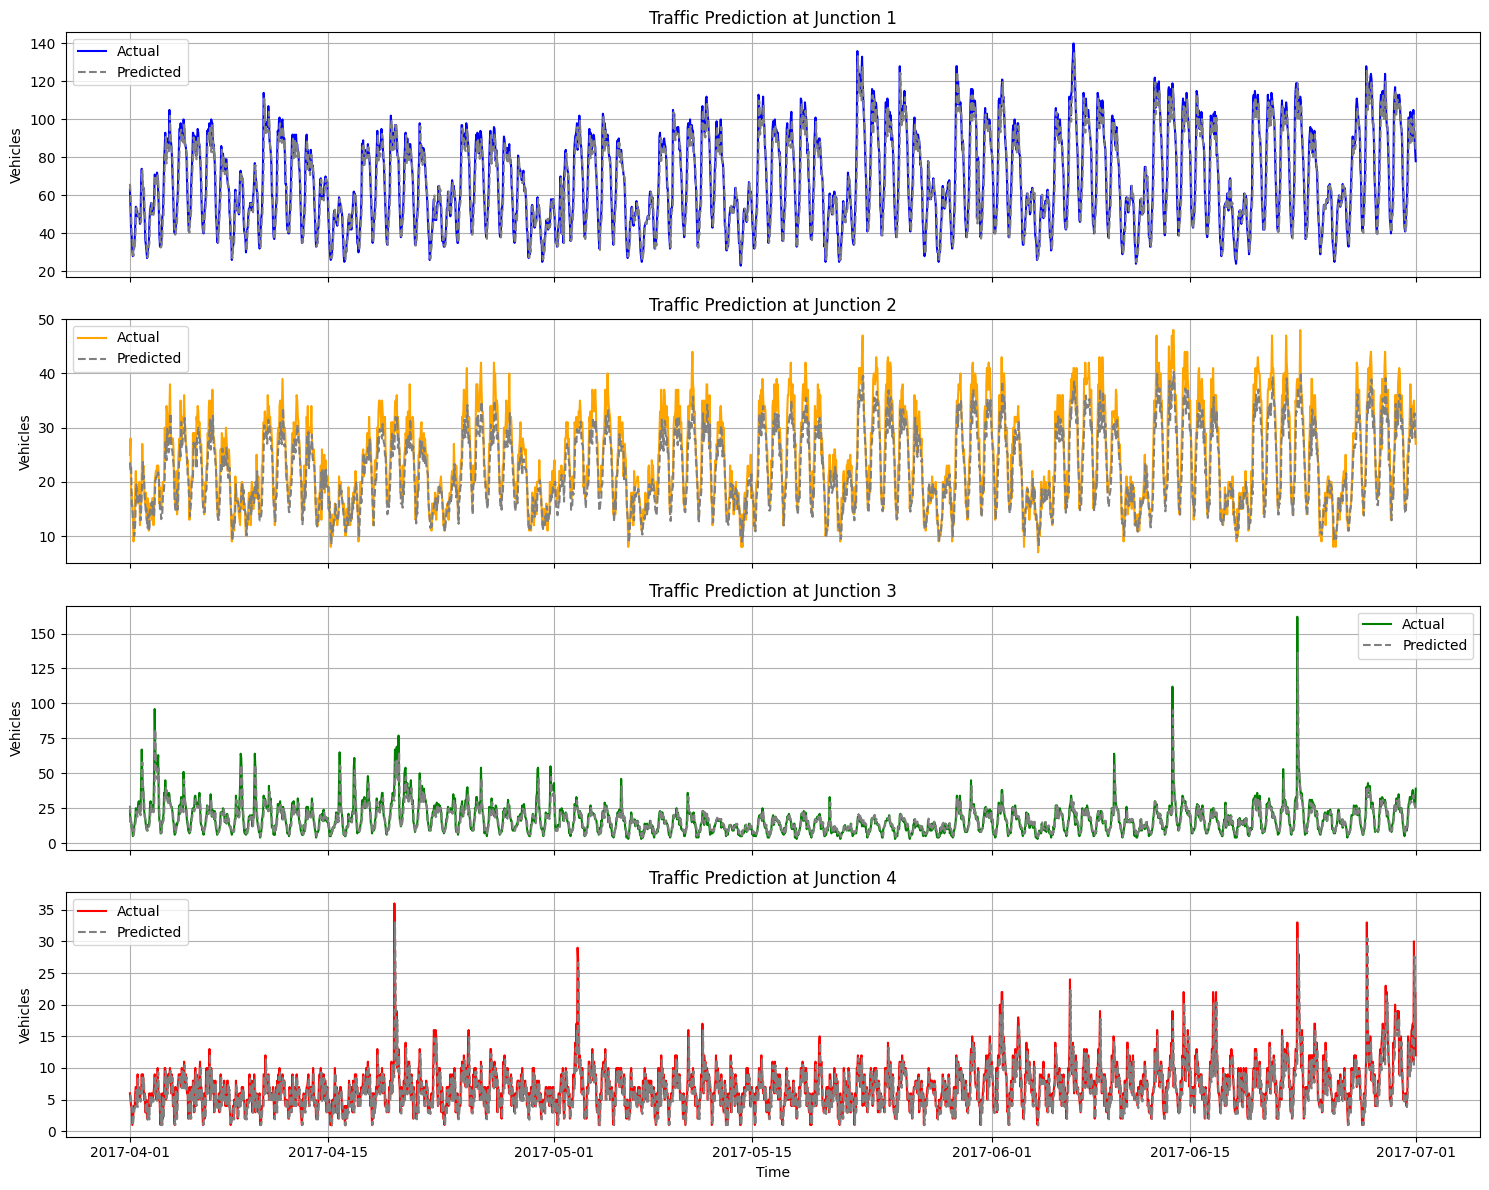

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

junction_names = ['Junction 1', 'Junction 2', 'Junction 3', 'Junction 4']
colors = ['blue', 'orange', 'green', 'red']

for i in range(4):
    axs[i].plot(y_test.index, y_test.iloc[:, i], label='Actual', color=colors[i])
    axs[i].plot(y_test.index, y_pred[:, i], label='Predicted', linestyle='--', color='gray')
    axs[i].set_title(f'Traffic Prediction at {junction_names[i]}')
    axs[i].set_ylabel('Vehicles')
    axs[i].legend()
    axs[i].grid(True)

plt.xlabel('Time')
plt.tight_layout()
plt.show()

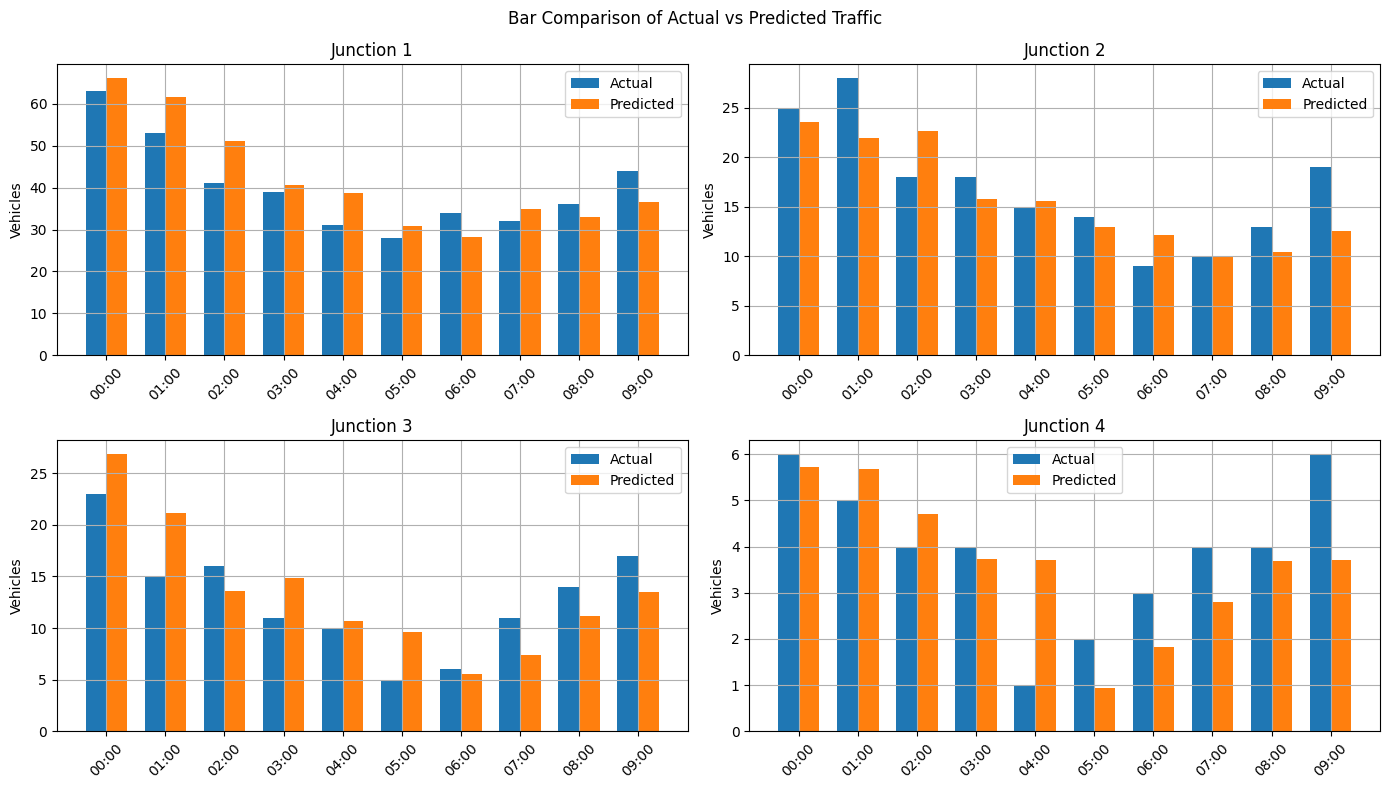

In [ ]:
import numpy as np

sample_hours = 10
x = np.arange(sample_hours)
width = 0.35

fig, axs = plt.subplots(2, 2, figsize=(14, 8))
axs = axs.flatten()

for i in range(4):
    axs[i].bar(x - width/2, y_test.iloc[:sample_hours, i], width, label='Actual')
    axs[i].bar(x + width/2, y_pred[:sample_hours, i], width, label='Predicted')
    axs[i].set_title(f'Junction {i+1}')
    axs[i].set_ylabel('Vehicles')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(y_test.index[:sample_hours].strftime('%H:%M'), rotation=45)
    axs[i].legend()
    axs[i].grid(True)

plt.suptitle("Bar Comparison of Actual vs Predicted Traffic")
plt.tight_layout()
plt.show()

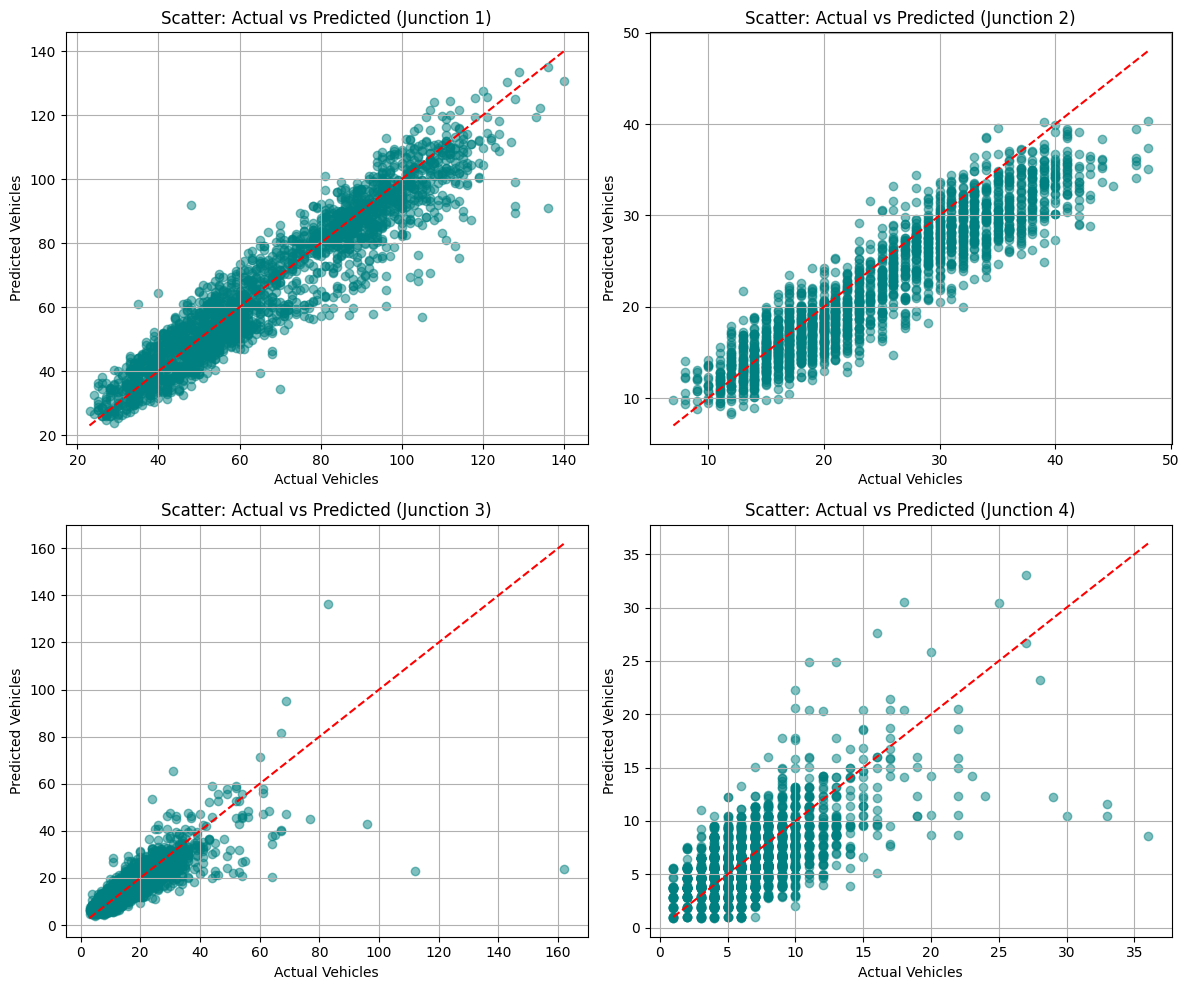

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i in range(4):
    axs[i].scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.5, c='teal')
    axs[i].plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
                [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'r--')
    axs[i].set_title(f'Scatter: Actual vs Predicted (Junction {i+1})')
    axs[i].set_xlabel('Actual Vehicles')
    axs[i].set_ylabel('Predicted Vehicles')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from ipywidgets import interact
import seaborn as sns

def plot_scatter(junction):
    j_idx = junction - 1
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test.iloc[:, j_idx], y=y_pred[:, j_idx], alpha=0.6)
    plt.plot([y_test.iloc[:, j_idx].min(), y_test.iloc[:, j_idx].max()],
             [y_test.iloc[:, j_idx].min(), y_test.iloc[:, j_idx].max()], 'r--')
    plt.xlabel('Actual Vehicles')
    plt.ylabel('Predicted Vehicles')
    plt.title(f'Junction {junction}: Actual vs Predicted')
    plt.grid(True)
    plt.show()

interact(plot_scatter, junction=[1, 2, 3, 4])


interactive(children=(Dropdown(description='junction', options=(1, 2, 3, 4), value=1), Output()), _dom_classes…

<function __main__.plot_scatter(junction)>

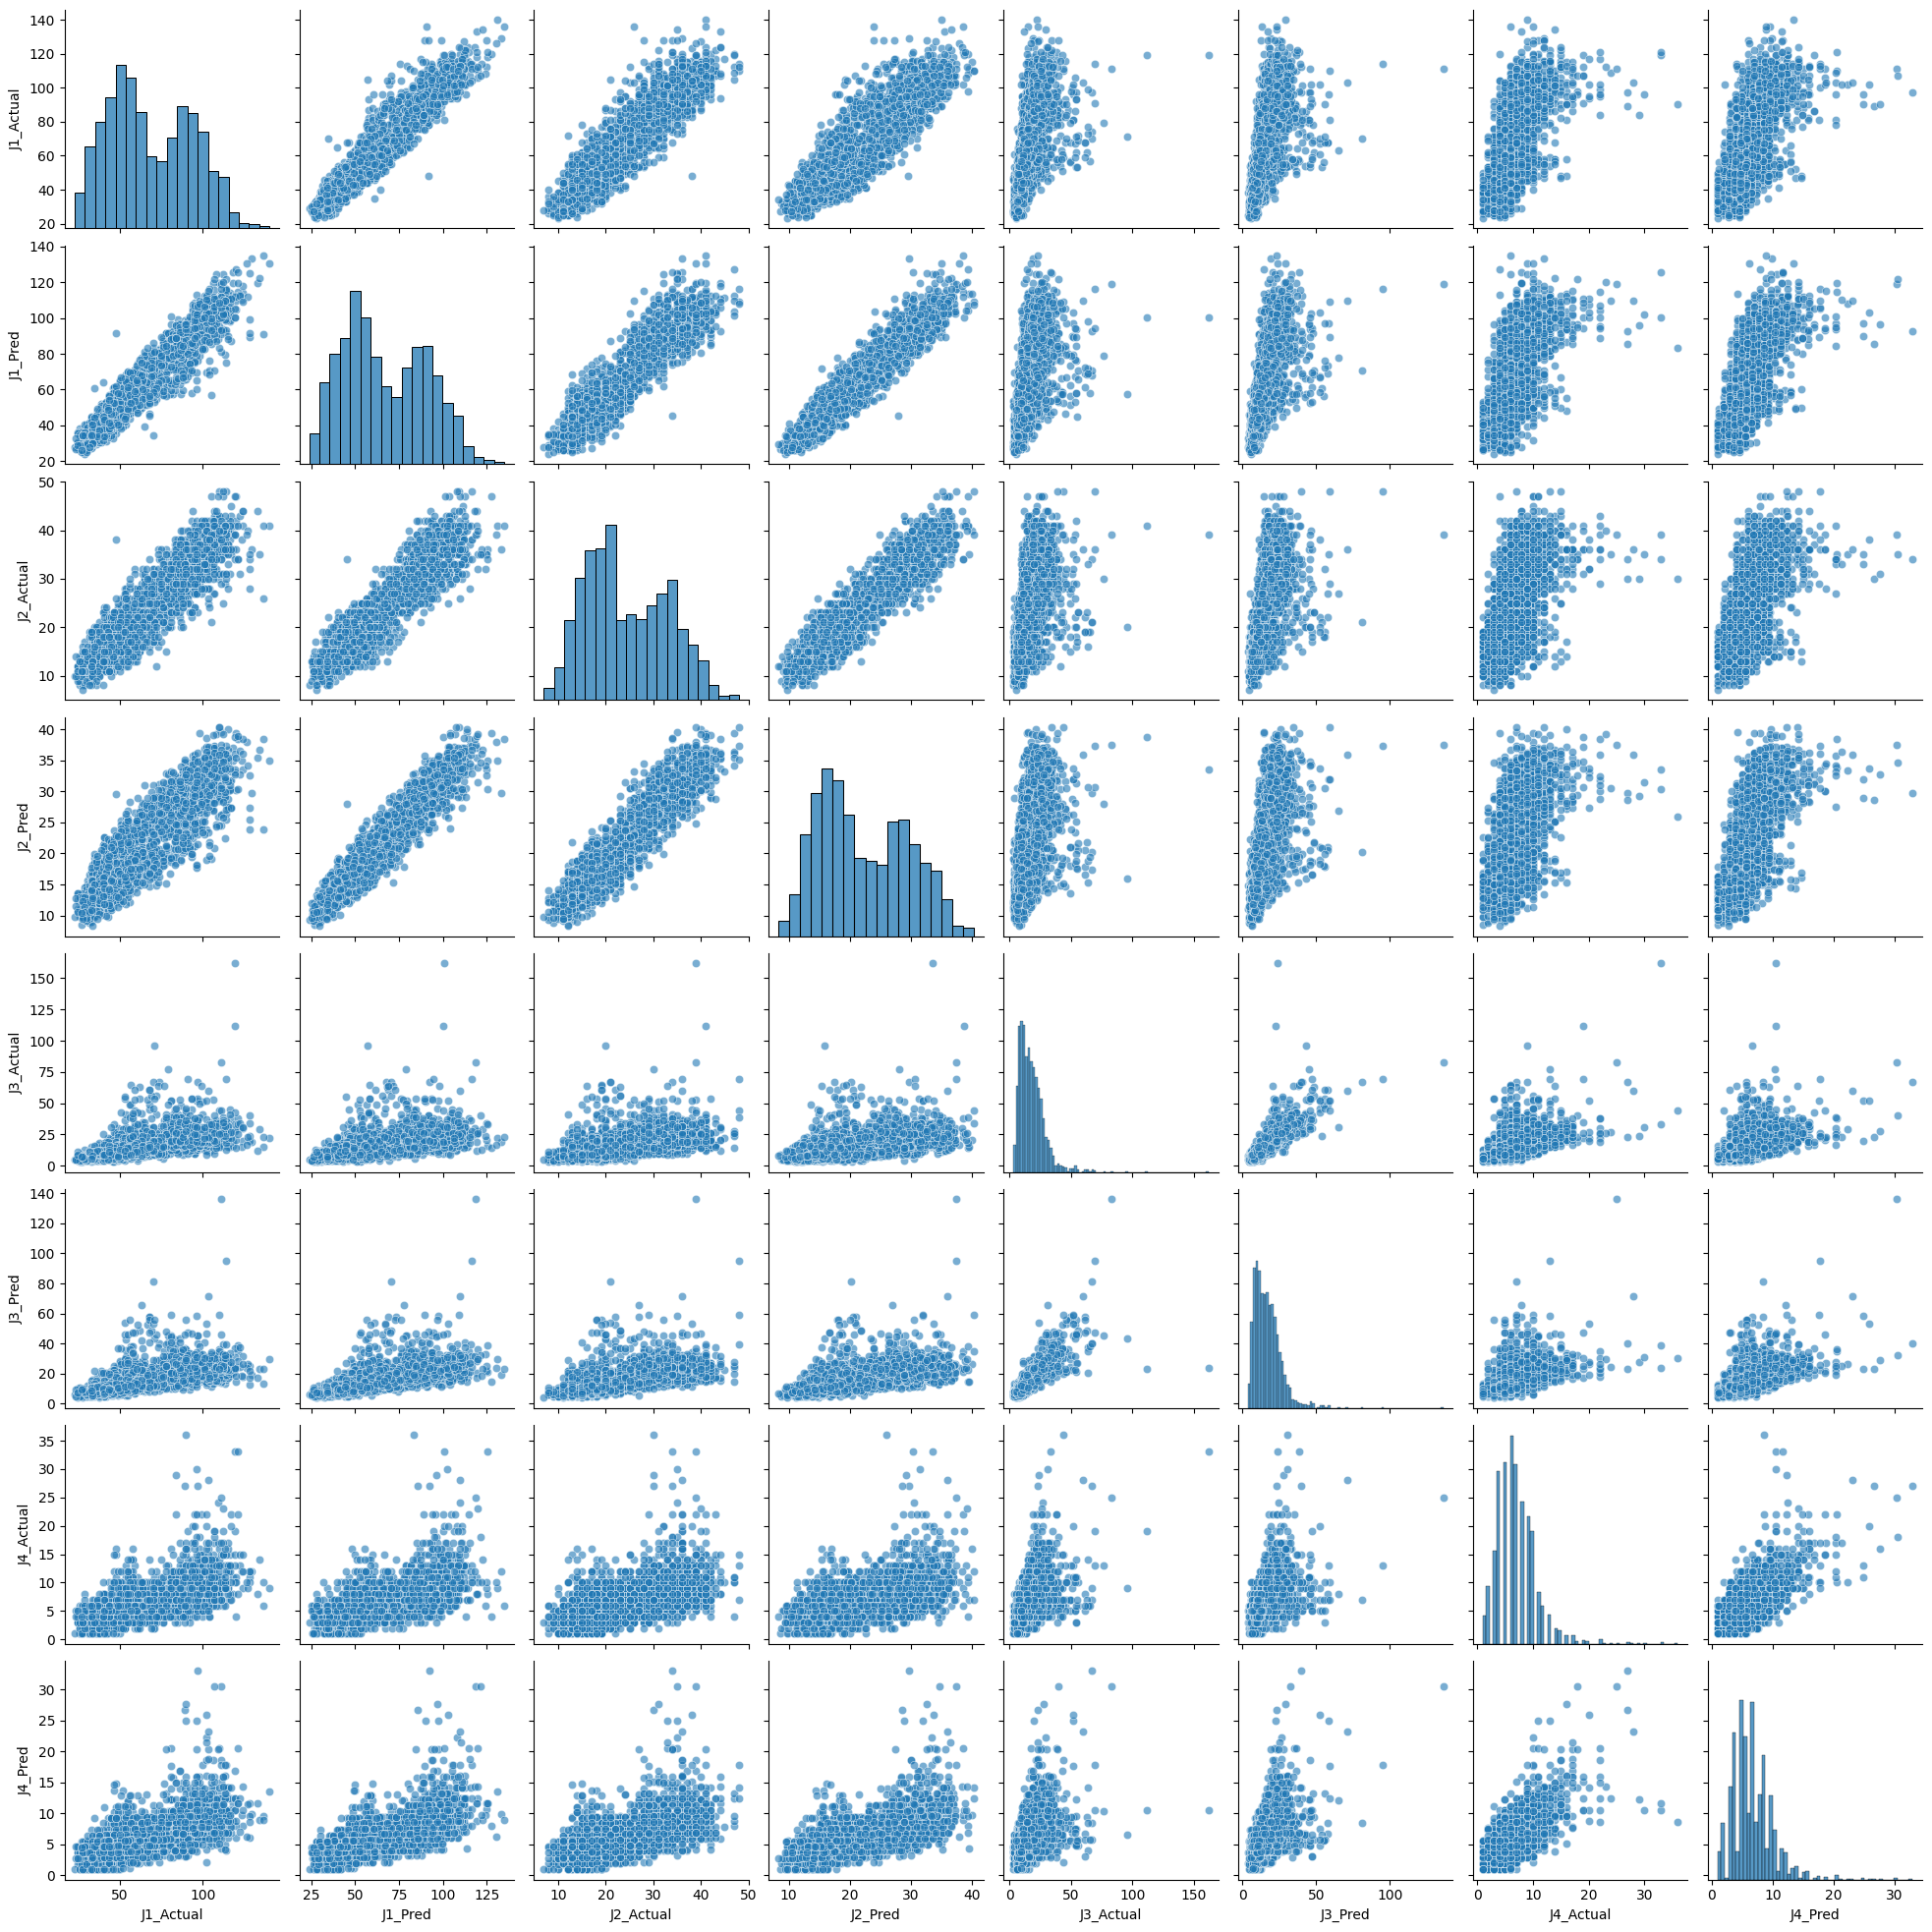

In [ ]:
import pandas as pd
import seaborn as sns

df_compare = pd.DataFrame({
    'J1_Actual': y_test.iloc[:, 0],
    'J1_Pred': y_pred[:, 0],
    'J2_Actual': y_test.iloc[:, 1],
    'J2_Pred': y_pred[:, 1],
    'J3_Actual': y_test.iloc[:, 2],
    'J3_Pred': y_pred[:, 2],
    'J4_Actual': y_test.iloc[:, 3],
    'J4_Pred': y_pred[:, 3],
})

sns.pairplot(df_compare, plot_kws={'alpha': 0.6})


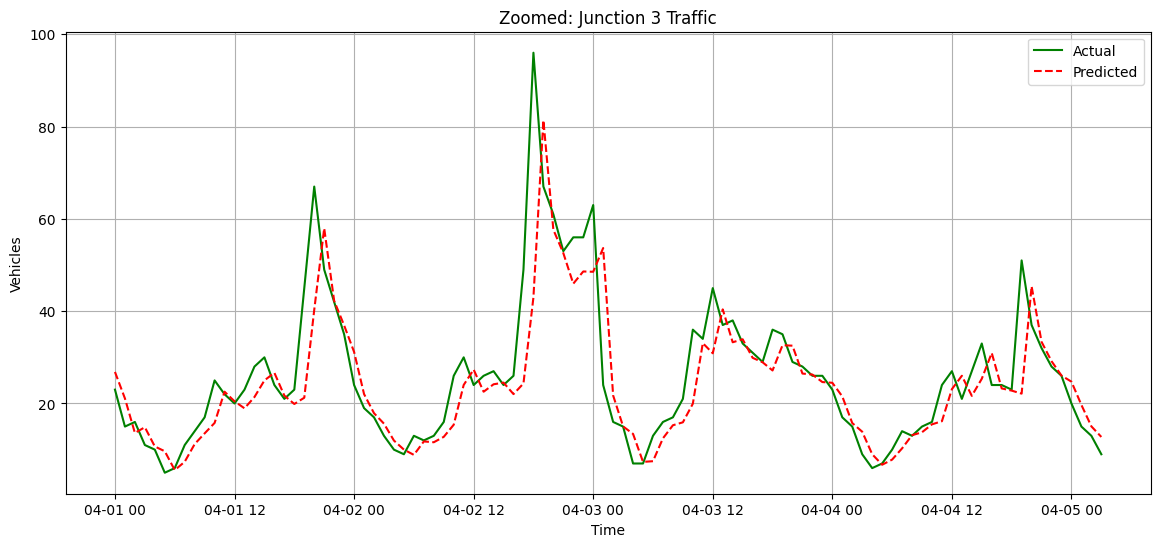

In [ ]:
start_idx = 0
end_idx = 100

plt.figure(figsize=(14, 6))
plt.plot(y_test.index[start_idx:end_idx], y_test.iloc[start_idx:end_idx, 2], label='Actual', color='green')
plt.plot(y_test.index[start_idx:end_idx], y_pred[start_idx:end_idx, 2], label='Predicted', linestyle='--', color='red')
plt.title('Zoomed: Junction 3 Traffic')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.grid(True)
plt.show()


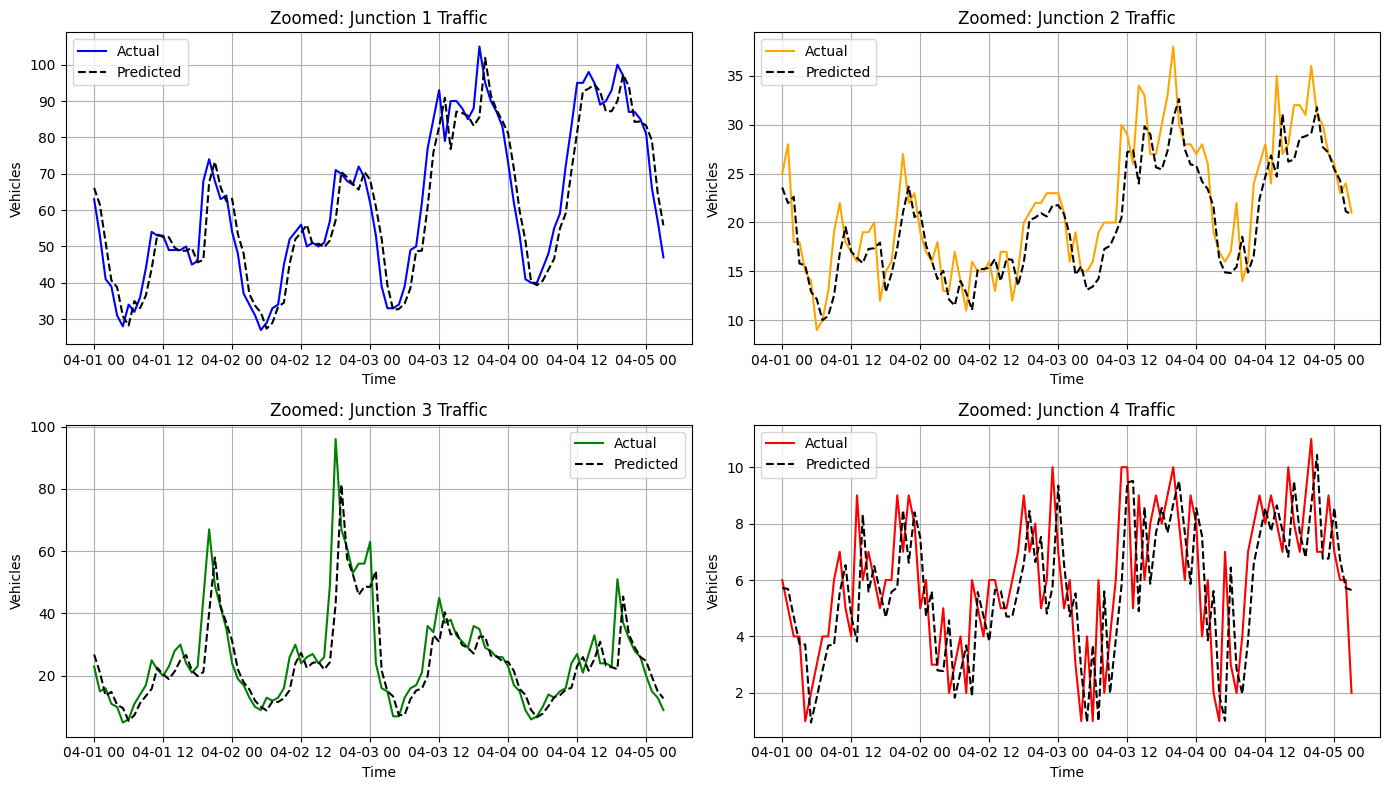

In [ ]:
start_idx = 0
end_idx = 100

junction_names = ['Junction 1', 'Junction 2', 'Junction 3', 'Junction 4']
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(14, 8))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(y_test.index[start_idx:end_idx], y_test.iloc[start_idx:end_idx, i],
             label='Actual', color=colors[i])
    plt.plot(y_test.index[start_idx:end_idx], y_pred[start_idx:end_idx, i],
             label='Predicted', linestyle='--', color='black')
    plt.title(f'Zoomed: {junction_names[i]} Traffic')
    plt.xlabel('Time')
    plt.ylabel('Vehicles')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
